In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cardataset = pd.read_csv('autompg.csv')

In [12]:
cardataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Defining the x and y values

In [6]:
car = pd.DataFrame(cardataset,columns=['acceleration','mpg'])

In [13]:
car.head()

,acceleration,mpg
0,12.0,18.0
1,11.5,15.0
2,11.0,18.0
3,12.0,16.0
4,10.5,17.0


# Converting to array

In [8]:
car_arr = np.array(car)

In [11]:
car_arr[0,1]

18.0

# Function Definitions

In [29]:
def mse(m,c,points):
    t_err = 0
    n = len(points)
    for i in range(0,n):
        x = points[i,0]
        y = points[i,1]
        t_err += (y - (m * x +c)) ** 2
        
    mserr = t_err/n
    
    return (mserr)

In [44]:
def gradient(m_curr,c_curr,points,lrate):
    m_grad = 0
    c_grad = 0
    n = len(points)
    for i in range(n):
        x = points[i,0]
        y = points[i,1]
        m_grad += (2/n)*(y - (m_curr * x + c_curr))*(-x)
        c_grad += (2/n)*(y - (m_curr * x + c_curr))*(-1)
        
    m_new = m_curr - lrate * m_grad
    c_new = c_curr - lrate * c_grad
    
    return (m_new,c_new)

In [67]:
def iterate(m_ini,c_ini,iteration,points,lrate):
    for i in range(iteration):
        m_ini,c_ini = gradient(m_ini,c_ini,points,lrate)
        
    m_fin = m_ini
    c_fin = c_ini
    
    return(m_fin,c_fin)

# Initialization

In [21]:
m_ini = 0
c_ini = 0
num_iterate = 1000
learning_rate = 0.0001

# Computation of MSE, m and c values

In [30]:
print('Starting the gradient descent at m = {0}, c = {1} and mse = {2}'.format(m_ini,c_ini,mse(m_ini,c_ini,car_arr)))

Starting the gradient descent at m = 0, c = 0 and mse = 613.8712562814071


In [59]:
print('After {0} iterations, at learning rate = {1}, the values of m and c = {2}'.format(num_iterate,learning_rate,iterate(m_ini,c_ini,num_iterate,car_arr,learning_rate)))

After 1000 iterations, at learning rate = 0.0001, the values of m and c = (1.4931509862180814, 0.12252253313266287)


In [46]:
m,c = iterate(m_ini,c_ini,num_iterate,car_arr,learning_rate)

In [47]:
print (m,c)

1.4931509862180814 0.12252253313266287


In [69]:
mserror = mse(m,c,car_arr)

In [61]:
print('After {0} iterations,at learrning rate {1}, the values of MSE is {2}'.format(num_iterate,learning_rate,mse(m,c,car_arr)))

After 1000 iterations,at learrning rate 0.0001, the values of MSE is 50.8852731718681


# Scatter Plot 

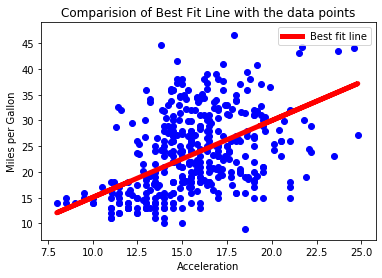

In [58]:
for i in range(0,len(car_arr)):
    x = car_arr[i,0]
    y = car_arr[i,1]
    plt.scatter(x,y,color='b')
plt.plot(car.acceleration, (m * car.acceleration + c), color = 'r',linewidth=5,label='Best fit line')
plt.xlabel('Acceleration')
plt.ylabel('Miles per Gallon')
plt.title('Comparision of Best Fit Line with the data points')
plt.legend()

# Gradient and y-intercept in the form y = m * x + c

In [74]:
print('At MSE {0}, the equation of the line generated is {1} = {2} * {3} + {4}'.format(mserror,'MPG',m,'ACCELERATION',c))

At MSE 50.8852731718681, the equation of the line generated is MPG = 1.4931509862180814 * ACCELERATION + 0.12252253313266287


# Least Error using trial and error method

In [140]:
m_ini = 0
c_ini = 0
num_iterate = 10000
learning_rate = 0.0008

In [141]:
print('After {0} iterations, at learning rate = {1}, the values of m and c = {2}'.format(num_iterate,learning_rate,iterate(m_ini,c_ini,num_iterate,car_arr,learning_rate)))

After 10000 iterations, at learning rate = 0.0008, the values of m and c = (1.378479659762622, 1.9633884282907412)


In [142]:
m,c = iterate(m_ini,c_ini,num_iterate,car_arr,learning_rate)

In [143]:
print('After {0} iterations,at learrning rate {1}, the values of MSE is {2}'.format(num_iterate,learning_rate,mse(m,c,car_arr)))

After 10000 iterations,at learrning rate 0.0008, the values of MSE is 50.44650200987142
